In [57]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [58]:
df=pd.read_csv('../dataset/uber.csv',encoding='latin-1')

<AxesSubplot: >

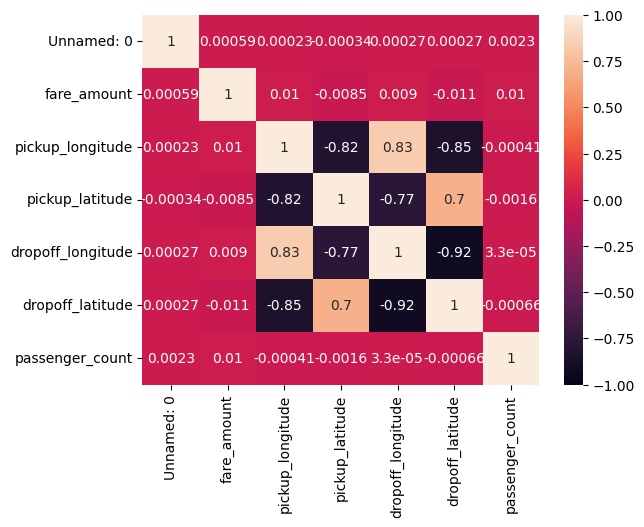

In [59]:
sb.heatmap(df.corr(),annot=True,vmin=-1,vmax=1)

In [60]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [61]:
df.tail()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1
199999,11951496,2010-05-15 04:08:00.00000076,14.1,2010-05-15 04:08:00 UTC,-73.984395,40.720077,-73.985508,40.768793,1


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [63]:
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [64]:
df.shape

(200000, 9)

In [65]:
df.drop(['Unnamed: 0','key'], axis=1,inplace=True)

In [66]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [67]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [68]:
df.duplicated().sum()

0

In [69]:
df.dropna(axis=0,inplace=True)

In [70]:
df.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [71]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000
mean,11.359892,-72.527631,39.935881,-72.525292,39.923890,1.684543
std,9.901760,11.437815,7.720558,13.117408,6.794829,1.385995
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [72]:
df.drop(df[df.pickup_latitude<-90].index, inplace = True)

In [73]:
df.drop(df[df.pickup_latitude>90].index, inplace = True)

In [74]:
df.drop(df[df.pickup_longitude<-180].index, inplace = True)

In [75]:
df.drop(df[df.pickup_longitude>80].index, inplace = True)

In [76]:
df.drop(df[df.dropoff_latitude<-90].index, inplace = True)

In [77]:
df.drop(df[df.dropoff_latitude>90].index, inplace = True)

In [78]:
df.drop(df[df.dropoff_longitude<-180].index, inplace = True)

In [79]:
df.drop(df[df.dropoff_longitude>80].index, inplace = True)

In [80]:
df[df.pickup_latitude<-90]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [81]:
df[df.pickup_latitude>90]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [82]:
df[df.pickup_longitude<-180]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [83]:
df[df.pickup_longitude>180]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [84]:
df[df.dropoff_latitude<-90]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [85]:
df[df.dropoff_latitude>90]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [86]:
df[df.dropoff_longitude<-180]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [87]:
df[df.dropoff_longitude>180]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [88]:
df[df.fare_amount<0]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
63395,-5.00,2015-03-03 23:07:41 UTC,-73.992249,40.748936,-73.988518,40.748180,1
71246,-3.30,2010-02-11 21:47:10 UTC,-73.952725,40.768235,-73.949928,40.772208,2
79903,-3.50,2015-05-01 14:43:02 UTC,-73.982430,40.775024,-73.981750,40.778439,1
89322,-49.57,2010-03-09 08:26:10 UTC,-73.972772,40.785657,-73.972867,40.785500,5
92063,-23.70,2010-03-12 08:49:10 UTC,-73.952740,40.768233,-74.007028,40.707338,3
98875,-52.00,2015-03-20 21:31:14 UTC,-74.000359,40.728729,-74.005699,40.728680,5
104080,-7.30,2010-03-09 20:25:10 UTC,-73.952623,40.766942,-73.953787,40.784882,1
111589,-52.00,2015-02-23 19:26:44 UTC,-73.984665,40.759026,0.000000,0.000000,5
139272,-6.90,2010-02-23 18:52:10 UTC,-73.988727,40.736445,-73.977622,40.750487,1
148803,-5.70,2010-02-12 10:50:10 UTC,-73.977300,40.742783,-73.988837,40.747465,3


In [89]:
df.drop(df[df.fare_amount<0].index,inplace=True)

In [90]:
df[df.fare_amount<0]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [91]:
df['passenger_count'].unique()

array([  1,   3,   5,   2,   4,   6,   0, 208], dtype=int64)

In [92]:
df['passenger_count'].value_counts()

1      138407
2       29425
5       14005
3        8878
4        4275
6        4271
0         708
208         1
Name: passenger_count, dtype: int64

In [93]:
df[df.passenger_count==208]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
113038,11.7,2010-12-28 08:20:00 UTC,-73.937795,40.758498,-73.937835,40.758415,208


In [94]:
df.drop(df[df.passenger_count==208].index,inplace=True)

In [95]:
df[df.passenger_count==0]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
333,10.1,2011-08-05 07:03:08 UTC,-74.013900,40.707800,-73.992300,40.749300,0
908,11.7,2011-09-06 12:25:19 UTC,-73.981000,40.764600,-73.962900,40.778400,0
926,3.3,2012-03-26 18:11:24 UTC,-73.979978,40.765821,-73.983894,40.766873,0
2000,15.7,2012-04-20 15:07:57 UTC,-73.975285,40.750138,-73.974729,40.783151,0
3011,6.1,2012-01-07 19:19:08 UTC,-73.977900,40.789100,-73.983700,40.773600,0
...,...,...,...,...,...,...,...
196797,3.3,2011-01-17 15:52:26 UTC,-74.000760,40.757637,-74.004852,40.751947,0
197103,7.3,2011-12-10 15:33:12 UTC,0.000000,0.000000,0.000000,0.000000,0
198872,5.7,2011-09-20 19:55:05 UTC,-73.980300,40.742800,-73.967900,40.755600,0
198902,12.1,2011-08-22 21:10:56 UTC,-73.996700,40.737200,-74.008500,40.704000,0


In [96]:
df.drop(df[df.passenger_count==0].index,inplace=True)

In [97]:
!pip install geopy

In [98]:
from geopy.distance import great_circle
distance=[]
for i in tqdm(df.index):
    pickup=(df['pickup_latitude'][i],df['pickup_longitude'][i])
    dropoff=(df['dropoff_latitude'][i],df['dropoff_longitude'][i])
    distance.append(round(great_circle(pickup,dropoff).km,2))
df['distance (km)']=distance


100%|███████████████████████████████████████████████████████████████████████| 199261/199261 [00:08<00:00, 22590.26it/s]


In [99]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance (km)
count,199261.000000,199261.000000,199261.000000,199261.000000,199261.000000,199261.000000,199261.000000
mean,11.369090,-72.503837,39.918989,-72.513700,39.923096,1.689453,20.363899
std,9.906025,10.443377,6.128334,10.405451,6.115539,1.305393,377.341209
min,0.000000,-93.824668,-74.015515,-75.458979,-74.015750,1.000000,0.000000
25%,6.000000,-73.992063,40.734795,-73.991409,40.733827,1.000000,1.220000
50%,8.500000,-73.981823,40.752583,-73.980094,40.753042,1.000000,2.120000
75%,12.500000,-73.967160,40.767155,-73.963662,40.767995,2.000000,3.880000
max,499.000000,40.808425,48.018760,40.831932,45.031598,6.000000,8782.910000


In [100]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance (km)
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1.68
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2.46
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,5.04
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1.66
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,4.48
...,...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1,0.11
199996,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1,1.88
199997,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2,12.85
199998,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1,3.54


In [101]:
df.drop(['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'],axis=1,inplace=True)

In [102]:
df

,fare_amount,pickup_datetime,passenger_count,distance (km)
0,7.5,2015-05-07 19:52:06 UTC,1,1.68
1,7.7,2009-07-17 20:04:56 UTC,1,2.46
2,12.9,2009-08-24 21:45:00 UTC,1,5.04
3,5.3,2009-06-26 08:22:21 UTC,3,1.66
4,16.0,2014-08-28 17:47:00 UTC,5,4.48
...,...,...,...,...
199995,3.0,2012-10-28 10:49:00 UTC,1,0.11
199996,7.5,2014-03-14 01:09:00 UTC,1,1.88
199997,30.9,2009-06-29 00:42:00 UTC,2,12.85
199998,14.5,2015-05-20 14:56:25 UTC,1,3.54


In [103]:
df[['date','time','ghj']]=df.pickup_datetime.str.split(' ',expand=True)

In [104]:
 df.drop('ghj',axis=1,inplace=True)

In [105]:
df

,fare_amount,pickup_datetime,passenger_count,distance (km),date,time
0,7.5,2015-05-07 19:52:06 UTC,1,1.68,2015-05-07,19:52:06
1,7.7,2009-07-17 20:04:56 UTC,1,2.46,2009-07-17,20:04:56
2,12.9,2009-08-24 21:45:00 UTC,1,5.04,2009-08-24,21:45:00
3,5.3,2009-06-26 08:22:21 UTC,3,1.66,2009-06-26,08:22:21
4,16.0,2014-08-28 17:47:00 UTC,5,4.48,2014-08-28,17:47:00
...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00 UTC,1,0.11,2012-10-28,10:49:00
199996,7.5,2014-03-14 01:09:00 UTC,1,1.88,2014-03-14,01:09:00
199997,30.9,2009-06-29 00:42:00 UTC,2,12.85,2009-06-29,00:42:00
199998,14.5,2015-05-20 14:56:25 UTC,1,3.54,2015-05-20,14:56:25


In [106]:
df.drop('pickup_datetime',axis=1,inplace=True)

In [107]:
df

,fare_amount,passenger_count,distance (km),date,time
0,7.5,1,1.68,2015-05-07,19:52:06
1,7.7,1,2.46,2009-07-17,20:04:56
2,12.9,1,5.04,2009-08-24,21:45:00
3,5.3,3,1.66,2009-06-26,08:22:21
4,16.0,5,4.48,2014-08-28,17:47:00
...,...,...,...,...,...
199995,3.0,1,0.11,2012-10-28,10:49:00
199996,7.5,1,1.88,2014-03-14,01:09:00
199997,30.9,2,12.85,2009-06-29,00:42:00
199998,14.5,1,3.54,2015-05-20,14:56:25


In [108]:
df[['year','month','day']]=df['date'].str.split('-',expand=True)

In [109]:
df[['hour','minute','second']]=df['time'].str.split(':',expand=True)

In [110]:
df.drop(['second','time'],axis=1,inplace=True)

In [111]:
df

,fare_amount,passenger_count,distance (km),date,year,month,day,hour,minute
0,7.5,1,1.68,2015-05-07,2015,05,07,19,52
1,7.7,1,2.46,2009-07-17,2009,07,17,20,04
2,12.9,1,5.04,2009-08-24,2009,08,24,21,45
3,5.3,3,1.66,2009-06-26,2009,06,26,08,22
4,16.0,5,4.48,2014-08-28,2014,08,28,17,47
...,...,...,...,...,...,...,...,...,...
199995,3.0,1,0.11,2012-10-28,2012,10,28,10,49
199996,7.5,1,1.88,2014-03-14,2014,03,14,01,09
199997,30.9,2,12.85,2009-06-29,2009,06,29,00,42
199998,14.5,1,3.54,2015-05-20,2015,05,20,14,56


In [112]:
df.dtypes

fare_amount        float64
passenger_count      int64
distance (km)      float64
date                object
year                object
month               object
day                 object
hour                object
minute              object
dtype: object

In [113]:
df['date']=pd.to_datetime(df['date'])

In [114]:
df=df.sort_values(by='date')

In [115]:
df=df.set_index('date')

In [116]:
df

,fare_amount,passenger_count,distance (km),year,month,day,hour,minute
date,,,,,,,,
2009-01-01,12.2,1,5.95,2009,01,01,02,09
2009-01-01,17.3,1,6.74,2009,01,01,17,25
2009-01-01,5.0,1,0.57,2009,01,01,02,14
2009-01-01,10.5,5,1.19,2009,01,01,12,46
2009-01-01,10.9,2,4.79,2009,01,01,15,40
...,...,...,...,...,...,...,...,...
2015-06-30,22.5,1,3.92,2015,06,30,17,18
2015-06-30,4.0,1,0.60,2015,06,30,09,20
2015-06-30,8.0,2,1.55,2015,06,30,14,20


In [117]:
df.drop(['minute'],axis=1,inplace=True)

In [118]:
df_y=pd.DataFrame(df.fare_amount.resample('Y').sum())

In [119]:
df_y

,fare_amount
date,
2009-12-31,305615.55
2010-12-31,306064.92
2011-12-31,327961.34
2012-12-31,361062.95
2013-12-31,396437.89
2014-12-31,390041.57
2015-12-31,178232.10


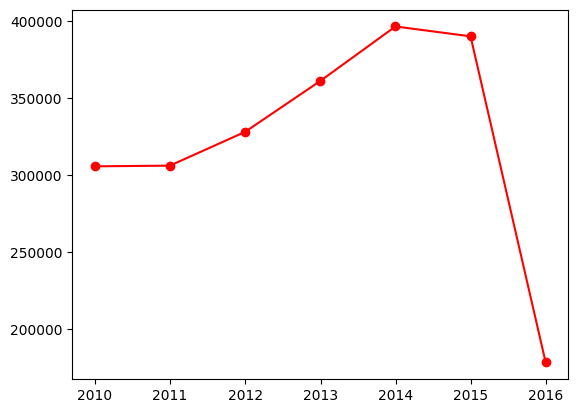

In [120]:
plt.plot(df_y['fare_amount'],'o-r')

In [121]:
df

,fare_amount,passenger_count,distance (km),year,month,day,hour
date,,,,,,,
2009-01-01,12.2,1,5.95,2009,01,01,02
2009-01-01,17.3,1,6.74,2009,01,01,17
2009-01-01,5.0,1,0.57,2009,01,01,02
2009-01-01,10.5,5,1.19,2009,01,01,12
2009-01-01,10.9,2,4.79,2009,01,01,15
...,...,...,...,...,...,...,...
2015-06-30,22.5,1,3.92,2015,06,30,17
2015-06-30,4.0,1,0.60,2015,06,30,09
2015-06-30,8.0,2,1.55,2015,06,30,14


In [122]:
x=df.drop(['fare_amount'],axis=1)
y=df.fare_amount

In [123]:
x

,passenger_count,distance (km),year,month,day,hour
date,,,,,,
2009-01-01,1,5.95,2009,01,01,02
2009-01-01,1,6.74,2009,01,01,17
2009-01-01,1,0.57,2009,01,01,02
2009-01-01,5,1.19,2009,01,01,12
2009-01-01,2,4.79,2009,01,01,15
...,...,...,...,...,...,...
2015-06-30,1,3.92,2015,06,30,17
2015-06-30,1,0.60,2015,06,30,09
2015-06-30,2,1.55,2015,06,30,14


In [124]:
y

date
2009-01-01    12.2
2009-01-01    17.3
2009-01-01     5.0
2009-01-01    10.5
2009-01-01    10.9
              ... 
2015-06-30    22.5
2015-06-30     4.0
2015-06-30     8.0
2015-06-30    18.5
2015-06-30    13.5
Name: fare_amount, Length: 199261, dtype: float64

In [125]:
from sklearn.model_selection import train_test_split as tts

In [126]:
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.20)

In [127]:
from sklearn.linear_model import LinearRegression

In [128]:
lr=LinearRegression().fit(x_train,y_train)

In [129]:
p=lr.predict(x_test)

In [130]:
p

array([10.60649323,  9.90443318, 12.46948733, ..., 12.44390665,
       12.2019865 , 12.68005787])

In [131]:
from sklearn.metrics import r2_score

In [132]:
r2_score(y_test,p)

0.01675247564040272

In [133]:
df

,fare_amount,passenger_count,distance (km),year,month,day,hour
date,,,,,,,
2009-01-01,12.2,1,5.95,2009,01,01,02
2009-01-01,17.3,1,6.74,2009,01,01,17
2009-01-01,5.0,1,0.57,2009,01,01,02
2009-01-01,10.5,5,1.19,2009,01,01,12
2009-01-01,10.9,2,4.79,2009,01,01,15
...,...,...,...,...,...,...,...
2015-06-30,22.5,1,3.92,2015,06,30,17
2015-06-30,4.0,1,0.60,2015,06,30,09
2015-06-30,8.0,2,1.55,2015,06,30,14


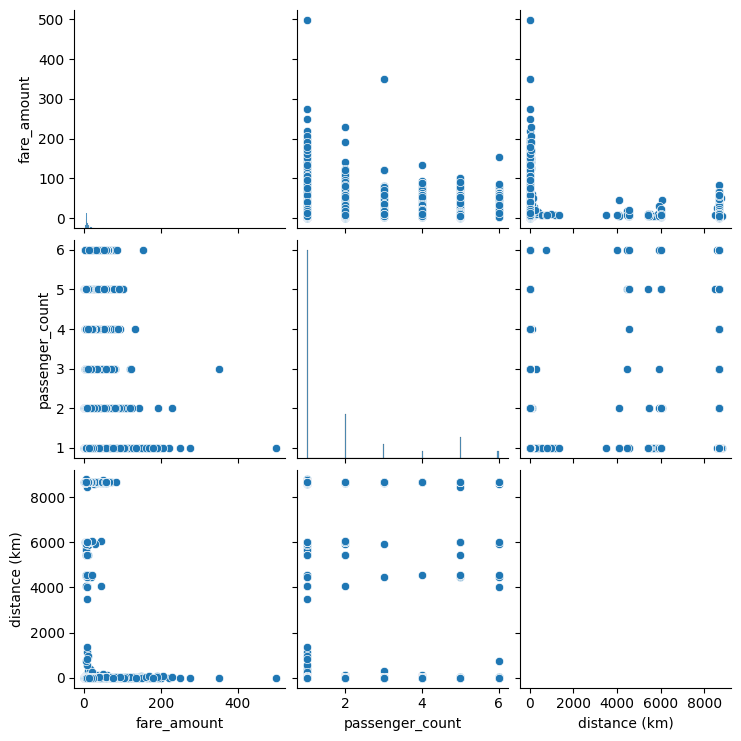

In [134]:
sb.pairplot(df)

In [135]:
df=df[['fare_amount','distance (km)']]

In [136]:
df.describe()

,fare_amount,distance (km)
count,199261.000000,199261.000000
mean,11.369090,20.363899
std,9.906025,377.341209
min,0.000000,0.000000
25%,6.000000,1.220000
50%,8.500000,2.120000
75%,12.500000,3.880000
max,499.000000,8782.910000


In [137]:
df[df.fare_amount<1]

,fare_amount,distance (km)
date,,
2010-03-07,0.11,0.00
2010-03-08,0.01,7.13
2010-03-20,0.00,11.07
2015-01-04,0.00,8666.00
2015-02-13,0.00,0.00
2015-02-17,0.00,0.00
2015-04-22,0.00,0.00
2015-05-31,0.01,0.00


In [138]:
df.drop(df[df.fare_amount<1].index,inplace=True)

In [139]:
df

,fare_amount,distance (km)
date,,
2009-01-01,12.2,5.95
2009-01-01,17.3,6.74
2009-01-01,5.0,0.57
2009-01-01,10.5,1.19
2009-01-01,10.9,4.79
...,...,...
2015-06-30,22.5,3.92
2015-06-30,4.0,0.60
2015-06-30,8.0,1.55


<AxesSubplot: xlabel='distance (km)', ylabel='fare_amount'>

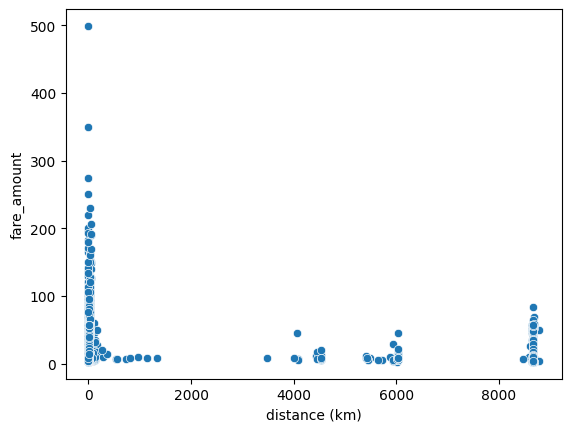

In [140]:
sb.scatterplot(x='distance (km)',y='fare_amount',data=df)